<a href="https://colab.research.google.com/github/samuelnascimento20/Tutorial_M1_SAMUEL_NASCIMENTO/blob/main/C%C3%B3pia_de_Exerc%C3%ADcio_Semana2_An%C3%A1lise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções

Copie esse notebook para seu drive para resolver os exercícios.

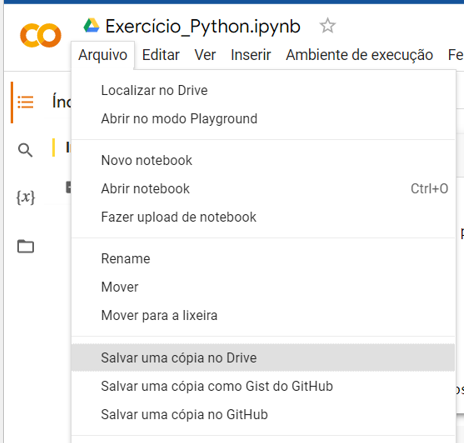


## Entrega

Após resolver os exercícios, coloque o notebook para público e compartilhe o link no campo de resposta do exercício no Adalove.

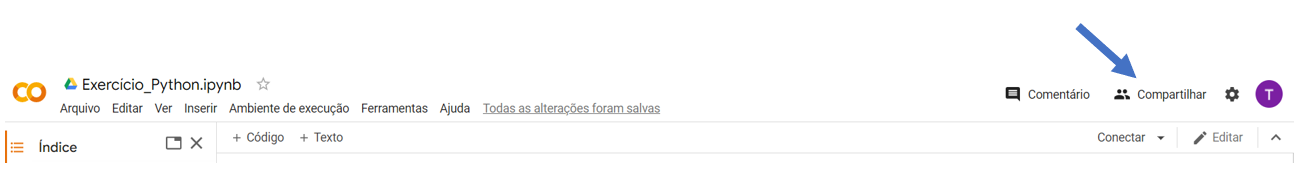

---

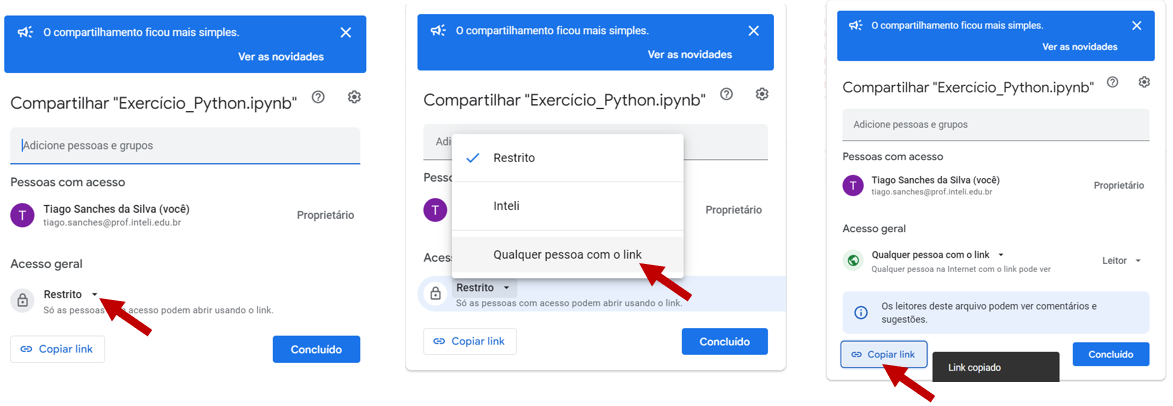


In [7]:
import pandas as pd
import plotly.express as px

In [8]:
# Download dos dados
!gdown 1tIqymcbVrlsNx7r7_C50yoVqmCVBmey-

Downloading...
From: https://drive.google.com/uc?id=1tIqymcbVrlsNx7r7_C50yoVqmCVBmey-
To: /content/vgsales_alt.csv
100% 1.28M/1.28M [00:00<00:00, 84.2MB/s]


In [9]:
df = pd.read_csv('/content/vgsales_alt.csv')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.29
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.03
2,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.01
3,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.01
4,Hyakka Hyakurou: Sengoku Ninpoujou,PSV,2016.0,Adventure,D3Publisher,0.00,0.0,0.02,0.02


# Exercício - Análise Descritiva

Explore o dataset de venda de games no mundo e responda as seguintes perguntas:

A) Qual o genero mais vendido na Europa?

B) Qual o Publisher que mais vendeu jogos entre 2005 e 2010?

C) Quais são os top 5 jogos mais vendidos do PS3 no Japão? **Apresente um gráfico de  barras para a resposta final**.

D) Qual plataforma mais lançou jogos do genero Adventure?



**Obs.: Crie quantas células de código e texto que julgar necessário para o cumprimento do exercício de forma satisfatória.**


# A)

In [14]:
genero = df.groupby('Genre')['EU_Sales'].sum().reset_index()
euro_vendas = genero.loc[genero['EU_Sales'].idxmax(), 'Genre']
euro_vendas

'Action'

'Nintendo'

# B)

In [18]:
vendas = df[(df['Year'] >= 2005) & (df['Year'] <= 2010)]
vendas_publicadas = vendas.groupby('Publisher')['Global_Sales'].sum().reset_index()
ninpublicadas = vendas_publicadas.loc[vendas_publicadas['Global_Sales'].idxmax(), 'Publisher']
ninpublicadas

'Nintendo'

# C)

In [20]:
top5 = df[(df['Platform'] == 'PS3') & (df['JP_Sales'] > 0)]
top5 = top5.sort_values(by='JP_Sales', ascending=False).head(5)
grafico = px.bar(top5, x='Name', y='JP_Sales')
grafico.show()

# D)


In [21]:
jogos_aventura = df[df['Genre'] == 'Adventure']['Platform']
jogos_aventura = jogos_aventura.value_counts().idxmax()
jogos_aventura

'DS'